# Walkthrough COCOAPI (via super_pycocotools)

The super_pycocotools module aims to help manage multiple datasets. Instead of having a list of variables instantiating a dataset each, we propose a dataset management format with a ".json" file gathering all the information of each dataset and a super class that instantiates each dataset and each data type using pycocotools. So each partition of each dataset is accessible by instantiating a single variable

## imports

In [1]:
import matplotlib.pyplot as plt
from PIL import Image

from super_pycocotools.coco import SuperCOCO

## load data

In [4]:
super_ann_file = './datasets.json'

#initialize COCO api
coco = SuperCOCO(super_ann_file)

processing DeepFruits
train data
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


## Information about datasets

In [3]:
coco.datasets

['DeepFruits', 'SIXray']

In [5]:
coco.DeepFruits.infos

{'root': '/home/cose-ia/Data/DeepFruits',
 'train': '/home/cose-ia/Data/DeepFruits/annotations/instances_train2017.json',
 'val': '',
 'test': '',
 'nb_images': 457,
 'nb_classes': 7,
 'nb_instances': 2553}

In [5]:
print("Number of images:")
for dataset in coco.datasets:
    print("\t-{}: {} ".format(dataset, coco[dataset].infos['nb_classes']))

Number of images:
	-DeepFruits: 7 
	-SIXray: 6 


## All pyococotools functions can be used on any dataset and any datatype

In [6]:
coco.DeepFruits.train.cats[4]

{'supercategory': 'apple', 'id': 4, 'name': 'apple'}

In [7]:
for key in coco.DeepFruits.train.imgs.keys():
    print(coco.DeepFruits.train.imgs[key])
    break

{'file_name': '1460105322_1756a2ed7f.png', 'height': 375, 'width': 500, 'id': 1}


In [8]:
im = coco.DeepFruits.train.loadImgs(152)[0]
im

{'file_name': 'n12761284_3687.png', 'height': 342, 'width': 500, 'id': 152}

In [9]:
data_dir = coco.DeepFruits.infos['root']
data_type = 'train2017'
image_path = '{}/{}/{}'.format(data_dir, data_type, im['file_name'])

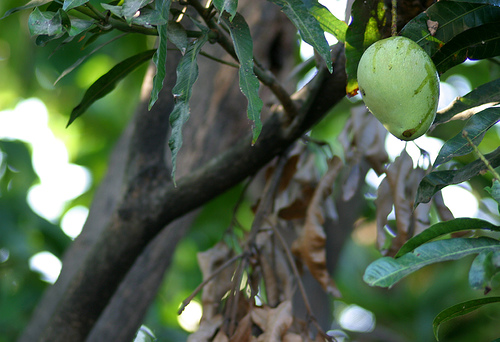

In [10]:
image = Image.open(image_path)
image

In [11]:
ann_ids = coco.DeepFruits.train.getAnnIds(imgIds=im['id'])
ann_ids

[852]

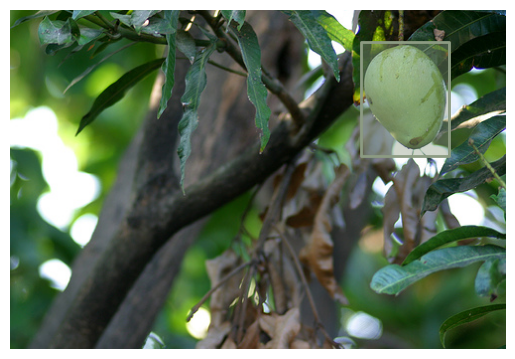

In [12]:
plt.imshow(image)
plt.axis('off')
anns = coco.DeepFruits.train.loadAnns(ann_ids)
coco.SIXray.train.showAnns(anns, draw_bbox=True)

## Easy way to register dataset into detectron

You can register an already instantiated dataset

In [3]:
coco.DeepFruits.register()

('DeepFruits_train',)

Or register dataset without instantiate them

In [5]:
from detectron2.data.catalog import DatasetCatalog
from super_pycocotools.detectron import register

DatasetCatalog.remove('DeepFruits_train')

register("datasets.json", "DeepFruits")

[('DeepFruits_train',)]

In [15]:
DatasetCatalog.remove('DeepFruits_train')

register("datasets.json")

[('DeepFruits_train',), ('SIXray_train', 'SIXray_test')]

In [ ]:
DatasetCatalog.get('DeepFruits_train')